<a href="https://colab.research.google.com/github/elizavetkachenko/portfolio/blob/main/python/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
zip_path = '/content/drive/My Drive/Mate/dataset.zip'

Mounted at /content/drive


In [2]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    df_countries = pd.read_csv(zip_ref.open('13. Final project/countries.csv'))
    df_events = pd.read_csv(zip_ref.open('13. Final project/events.csv'))
    df_products = pd.read_csv(zip_ref.open('13. Final project/products.csv'))

In [3]:
df_countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [4]:
df_events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [5]:
df_products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


# Data overview

### Зміст колонок, їх опис

df-countries

*   name - назва країни
*   alpha-2 - код країни з 2 букв
*   alpha-3 - код країни з 3 букв
*   region - регіон
*   sub-region - субрегіон


df_events

*   Order ID - код замовлення
*   Order Date - дата замовлення
*   Ship Date - дата відвантаження
*   Order Priority - пріоритет замовлення
*   Country Code - код країни з 3 букв
*   Product ID - кож товару
*   Sales Channel - канал збуту
*   Units Sold - кількість продажів
*   Unit Price - ціна за одиницю
*   Unit Cost - вартість одиниці товару

df_products

*   id - код товару
*   item_type - тип товару

### Ключові поля, що поєднують три таблиці.
df_countries стовпець alpha-3 та df_events стовпець country code

df_events стовпець product id та df_products стовпець id

# Data cleaning

## Пропущенні значення

In [6]:
print(f"К-ть пропущених значень у першій таблиці")
print(df_countries.isna().sum())
print()
print(f"К-ть пропущених значень у другій таблиці")
print(df_events.isna().sum())
print()
print(f"К-ть пропущених значень у третій таблиці")
print(df_products.isna().sum())

К-ть пропущених значень у першій таблиці
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

К-ть пропущених значень у другій таблиці
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64

К-ть пропущених значень у третій таблиці
id           0
item_type    0
dtype: int64


In [7]:
missing_percent_countries = df_countries.isnull().mean() * 100
print(f"Доля пропущених значень у першій таблиці (%)")
missing_percent_countries

Доля пропущених значень у першій таблиці (%)


,0
name,0.000000
alpha-2,0.401606
alpha-3,0.000000
region,0.401606
sub-region,0.401606


In [8]:
missing_percent_events = df_events.isnull().mean() * 100
print(f"Доля пропущених значень у другій таблиці (%)")
missing_percent_events

Доля пропущених значень у другій таблиці (%)


,0
Order ID,0.000000
Order Date,0.000000
Ship Date,0.000000
Order Priority,0.000000
Country Code,6.165414
Product ID,0.000000
Sales Channel,0.000000
Units Sold,0.150376
Unit Price,0.000000
Unit Cost,0.000000


In [9]:
missing_percent_products = df_products.isnull().mean() * 100
print(f"Доля пропущених значень у третій таблиці (%)")
missing_percent_products

Доля пропущених значень у третій таблиці (%)


,0
id,0.0
item_type,0.0


In [10]:
df_countries["region"] = df_countries["region"].fillna("Antarctica")
df_countries["sub-region"] = df_countries["sub-region"].fillna("Antarctica")
df_countries["alpha-2"] = df_countries["alpha-2"].fillna("NA")

In [11]:
df_events["Country Code"] = df_events["Country Code"].fillna("Unknown")
df_events["Units Sold"] = df_events["Units Sold"].fillna(df_events["Units Sold"].median())

In [12]:
print(f"К-ть пропущених значень у першій таблиці")
print(df_countries.isna().sum())
print()
print(f"К-ть пропущених значень у другій таблиці")
print(df_events.isna().sum())
print()
print(f"К-ть пропущених значень у третій таблиці")
print(df_products.isna().sum())

К-ть пропущених значень у першій таблиці
name          0
alpha-2       0
alpha-3       0
region        0
sub-region    0
dtype: int64

К-ть пропущених значень у другій таблиці
Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64

К-ть пропущених значень у третій таблиці
id           0
item_type    0
dtype: int64


### Причини виникнення:

1. Код Намібії NA ймовірно сприйнято як NaN, тож причиною можна вважати специфіку формату даних

2. Антарктика не належить жодному регіону, тож це була просто відсутність географічних даних.

3. В деяких замоленнях відсутній код країни, можливо виникла помилка при введенні даних

4. В 2 замоленнях не вказана кількість товару, можливо була помилка при оформленні замовлення



### Обгрунтування заповнення даних

1. "Antarctica" для регіону та субрегіону: Антарктика є окремим континентом, тому логічно надати їй власну унікальну категорію, а не залишати порожньою.

2. "NA" для коду країни: це офіційний код Намібії, заміна на рядок "NA" коректно представляє дані та вирішує проблему з неправильним розпізнаванням.

3. "Unknown" для коду країни: країну неможливо ідентифікувати, тому значення "Невідомо" є маркером для подальшого аналізу таких записів.

4. Медіана для "Units Sold": медіана стійка до викидів, тож це запобігає спотворенню даних(на відміну від середнього) та зберігає загальний розподіл даних.

## Тип даних

In [13]:
df_events['Order Date'] = pd.to_datetime(df_events['Order Date'])
df_events['Ship Date'] = pd.to_datetime(df_events['Ship Date'])
df_events['Order ID'] = df_events['Order ID'].astype(str)
df_events['Product ID'] = df_events['Product ID'].astype(str)
df_products['id'] = df_products['id'].astype(str)

In [14]:
print(f"Тип даних у df_countries")
print(df_countries.info())
print()
print(f"Тип даних у df_events")
print(df_events.info())
print()
print(f"Тип даних у df_products")
print(df_products.info())

Тип даних у df_countries
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     249 non-null    object
 2   alpha-3     249 non-null    object
 3   region      249 non-null    object
 4   sub-region  249 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
None

Тип даних у df_events
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   object        
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1330 non-null   object        
 5   Product ID      1330 non-null   object        


## Наявність дублікатів

In [15]:
def create_translation_table():
    cyrillic = 'аеорсухвкмнтАЕОРСУХВКМНТ'
    latin = 'aeopcyxbkmntAEOPCYXBKMHT'
    return str.maketrans(cyrillic, latin)

translation_table = create_translation_table()

def replace_cyrillic_to_latin(text):
    return str(text).translate(translation_table)

df_countries = df_countries.map(replace_cyrillic_to_latin)

df_events['Order Priority'] = df_events['Order Priority'].apply(replace_cyrillic_to_latin).astype(str).str.title().str.strip()
df_events['Country Code'] = df_events['Country Code'].apply(replace_cyrillic_to_latin).astype(str).str.upper().str.strip()
df_events['Sales Channel'] = df_events['Sales Channel'].apply(replace_cyrillic_to_latin).astype(str).str.title().str.strip()


df_products = df_products.map(replace_cyrillic_to_latin)

duplicates_countries = df_countries[df_countries.duplicated()]
print(f"Кількість дублікатів countries: {len(duplicates_countries)}")
print(duplicates_countries)

duplicates_events = df_events[df_events.duplicated()]
print(f"Кількість дублікатів events: {len(duplicates_events)}")
print(duplicates_events)

duplicates_products = df_products[df_products.duplicated()]
print(f"Кількість products: {len(duplicates_products)}")
print(duplicates_products)


Кількість дублікатів countries: 0
Empty DataFrame
Columns: [name, alpha-2, alpha-3, region, sub-region]
Index: []
Кількість дублікатів events: 0
Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Order Priority, Country Code, Product ID, Sales Channel, Units Sold, Unit Price, Unit Cost]
Index: []
Кількість products: 0
Empty DataFrame
Columns: [id, item_type]
Index: []


## Наявність аномалій

In [16]:
df_events[['Units Sold', 'Unit Price', 'Unit Cost']].describe()

,Units Sold,Unit Price,Unit Cost
count,1330.000000,1330.000000,1330.000000
mean,4952.216541,264.893541,187.246812
std,2903.012194,217.323460,176.158873
min,2.000000,9.330000,6.920000
25%,2360.750000,81.730000,35.840000
50%,4962.000000,154.060000,97.440000
75%,7458.750000,437.200000,263.330000
max,9999.000000,668.270000,524.960000


### Висновок щодо аномалій:

Розподіли даних для Unit Price та Unit Cost суттєво відрізняються. Велика різниця між середнім значенням та медіаною вказує на наявність невеликої кількості дуже дорогих товарів, які "зміщують" середнє значення вгору.

Розподіл для Units Sold є симетричним, оскільки середнє (4952,22) і медіана (4962,00) практично збігаються. Значних аномалій у кількості продажів не спостерігається.



# Data analysis and visualization

## З’єднання трьох таблиць в один датафрейм

In [17]:
df_merged = df_events.merge(df_countries, left_on='Country Code', right_on ='alpha-3', how='left')

df_final = df_merged.merge(df_products, left_on='Product ID', right_on='id', how='left')

print(f"Результат: {df_final.shape}")
df_final.head()

Результат: (1330, 17)


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,name,alpha-2,alpha-3,region,sub-region,id,item_type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,NO,NOR,Europe,Northern Europe,2103,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,RS,SRB,Europe,Southern Europe,2103,Cereal
2,101025998,2014-07-18,2014-08-11,M,UNKNOWN,7940,Online,4693.0,668.27,502.54,NaN,NaN,NaN,NaN,NaN,7940,Household
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,ME,MNE,Europe,Southern Europe,2455,Clothes
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,RS,SRB,Europe,Southern Europe,1270,Beverages


In [18]:
df_final = df_final.drop("alpha-2", axis=1)
df_final = df_final.drop("alpha-3", axis=1)
df_final = df_final.drop("id", axis=1)
df_final.columns = df_final.columns.str.title().str.replace(" ", "_")
df_final = df_final.rename(columns={'Name': 'Country_Name'})

df_final.head()

,Order_Id,Order_Date,Ship_Date,Order_Priority,Country_Code,Product_Id,Sales_Channel,Units_Sold,Unit_Price,Unit_Cost,Country_Name,Region,Sub-Region,Item_Type
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal
2,101025998,2014-07-18,2014-08-11,M,UNKNOWN,7940,Online,4693.0,668.27,502.54,NaN,NaN,NaN,Household
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages


In [19]:
df_final['Total_Revenue'] = df_final['Units_Sold'] * df_final['Unit_Price']
df_final['Total_Cost'] = df_final['Units_Sold'] * df_final['Unit_Cost']
df_final['Total_Profit'] = df_final['Total_Revenue'] - df_final['Total_Cost']
df_final['Marginality'] = round(df_final['Total_Profit'] / df_final['Total_Revenue'] * 100, 2)
df_final['Days_Interval'] = (df_final['Ship_Date'] - df_final['Order_Date']).dt.days
df_final["Country_Name"] = df_final["Country_Name"].fillna("Unknown")
df_final["Region"] = df_final["Region"].fillna("Unknown")

df_final.head()

,Order_Id,Order_Date,Ship_Date,Order_Priority,Country_Code,Product_Id,Sales_Channel,Units_Sold,Unit_Price,Unit_Cost,Country_Name,Region,Sub-Region,Item_Type,Total_Revenue,Total_Cost,Total_Profit,Marginality,Days_Interval
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal,133705.00,76121.50,57583.50,43.07,10
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal,409960.10,233400.23,176559.87,43.07,0
2,101025998,2014-07-18,2014-08-11,M,UNKNOWN,7940,Online,4693.0,668.27,502.54,Unknown,Unknown,NaN,Household,3136191.11,2358420.22,777770.89,24.80,24
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes,127966.88,41968.64,85998.24,67.20,31
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages,362897.60,243129.92,119767.68,33.00,38


In [20]:
print("Унікальні значення регіонів:", df_final['Region'].unique())

Унікальні значення регіонів: ['Europe' 'Unknown' 'Asia']


## Аналіз продажів в розрізі категорій

### Аналіз доходу в розрізі категорій товарів

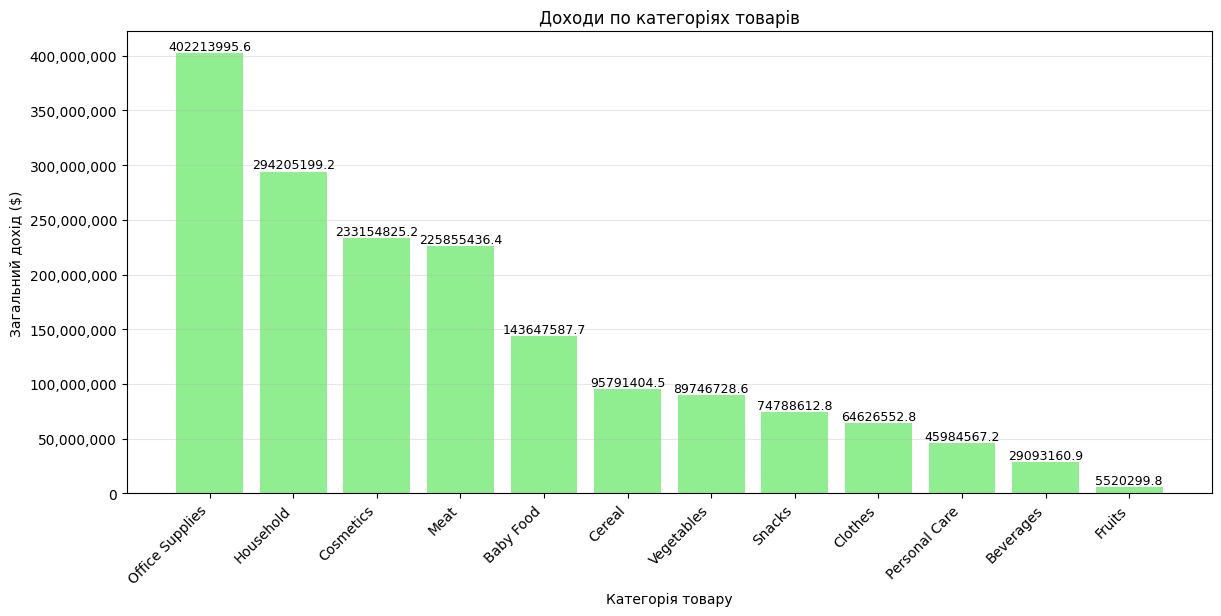

In [21]:
#Аналіз доходу в розрізі категорій товарів

category_revenue = df_final.groupby('Item_Type')['Total_Revenue'].sum().sort_values(ascending=False)

import matplotlib.ticker as ticker

plt.figure(figsize=(14, 6))
bars = plt.bar(category_revenue.index, category_revenue.values, color="lightgreen")
plt.title("Доходи по категоріях товарів")  # Title of the chart
plt.xlabel("Категорія товару")  # X-axis label
plt.ylabel("Загальний дохід ($)")  # Y-axis label
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.1f}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=9,
    )

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()


### Аналіз витрат в розрізі категорій товарів

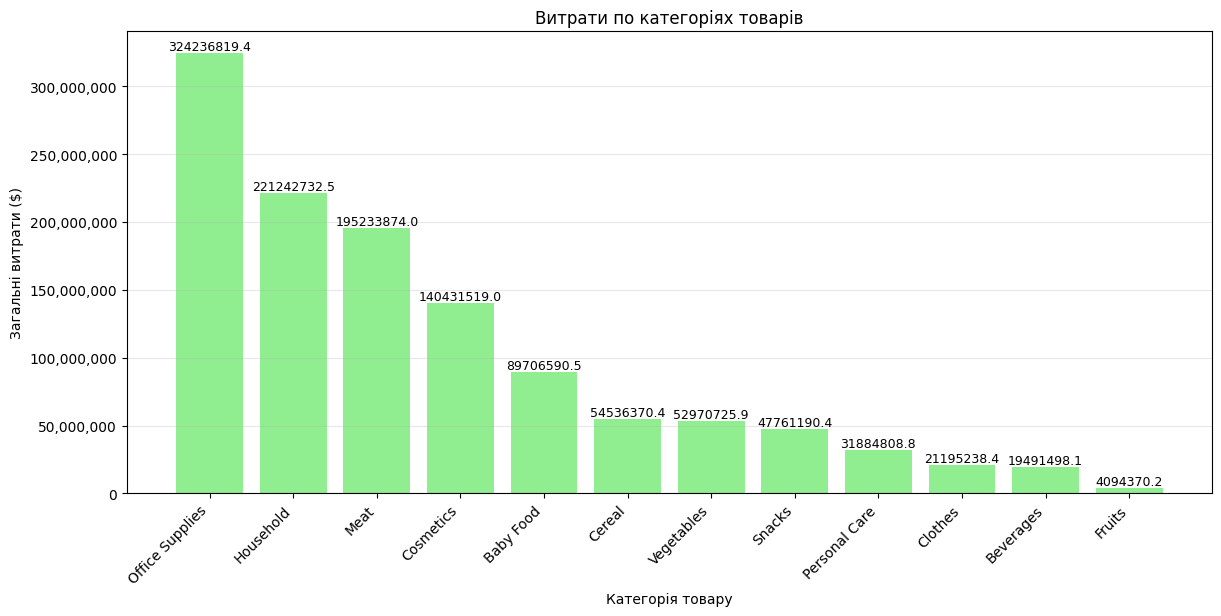

In [22]:
#Аналіз витрат в розрізі категорій товарів
category_cost = df_final.groupby('Item_Type')['Total_Cost'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
bars = plt.bar(category_cost.index, category_cost.values, color="lightgreen")
plt.title("Витрати по категоріях товарів")  # Title of the chart
plt.xlabel("Категорія товару")  # X-axis label
plt.ylabel("Загальні витрати ($)")  # Y-axis label
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.1f}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=9,
    )
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

###Аналіз прибутку в розрізі категорій товарів

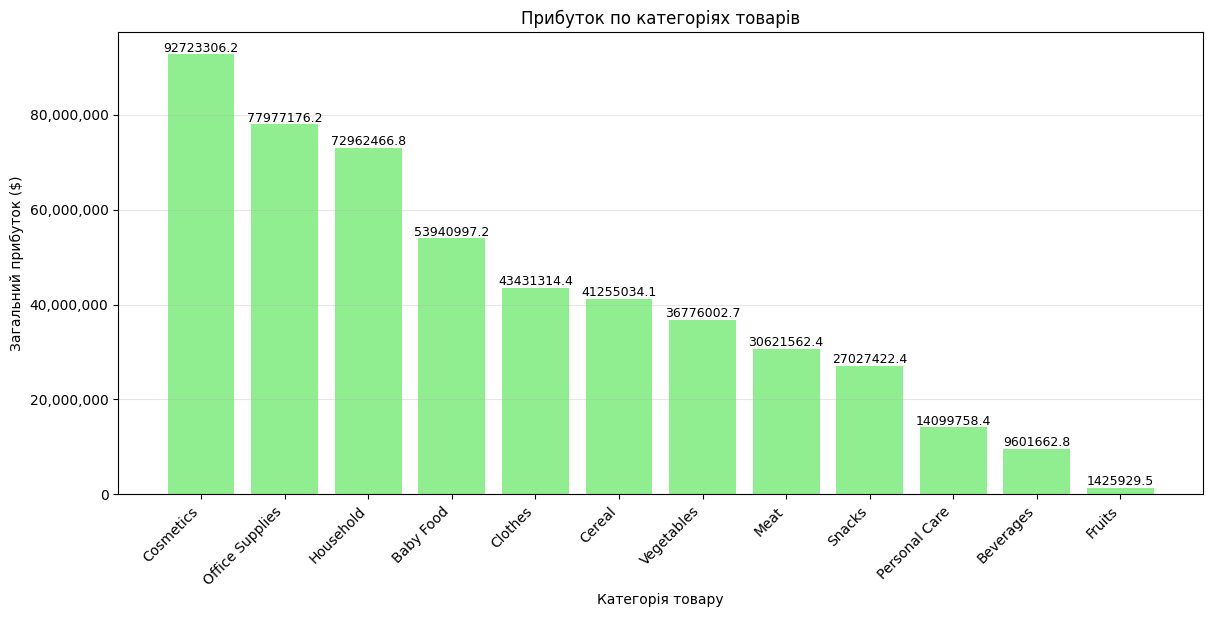

In [23]:
#Аналіз прибутку в розрізі категорій товарів
category_profit = df_final.groupby('Item_Type')['Total_Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
bars = plt.bar(category_profit.index, category_profit.values, color="lightgreen")
plt.title("Прибуток по категоріях товарів")  # Title of the chart
plt.xlabel("Категорія товару")  # X-axis label
plt.ylabel("Загальний прибуток ($)")  # Y-axis label
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() ,
        f"{bar.get_height():.1f}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=9,
    )
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

### Аналіз популярності товарів в розрізі категорій товарів

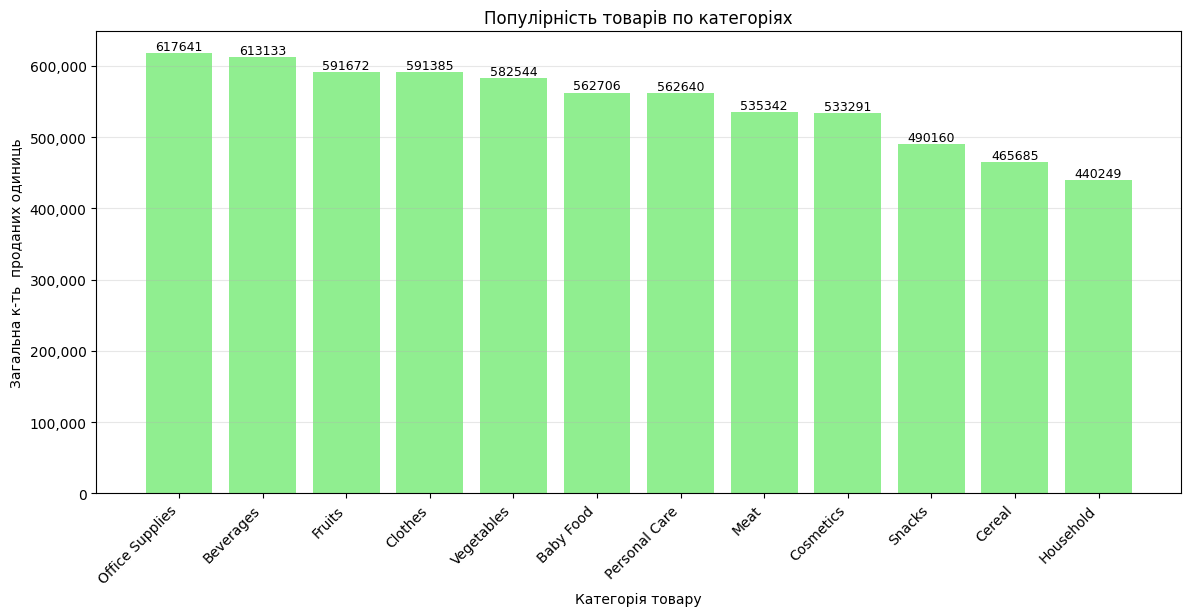

In [24]:
#Аналіз популярності товарів в розрізі категорій товарів
category_popularity = df_final.groupby('Item_Type')['Units_Sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
bars = plt.bar(category_popularity.index, category_popularity.values, color="lightgreen")
plt.title("Популірність товарів по категоріях")  # Title of the chart
plt.xlabel("Категорія товару")  # X-axis label
plt.ylabel("Загальна к-ть  проданих одиниць")  # Y-axis label
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.0f}",
        ha="center",
        va="bottom",
        color="black",
        fontsize=9,
    )
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

## Аналіз продажів в розрізі країн

In [25]:
import plotly.express as px

# Агрегуємо дані по країнах

filtered_df = df_final[df_final['Country_Name'] != 'Unknown'] #Прибираємо Unknown країни
country_stats = filtered_df.groupby('Country_Name').agg({
    'Total_Revenue': 'sum',
    'Total_Cost': 'sum',
    'Total_Profit': 'sum',
    'Units_Sold': 'sum',
}).reset_index().round(2)

# Інтерактивна карта доходу
fig = px.choropleth(country_stats,
                     locations="Country_Name",
                     locationmode='country names',
                     color="Total_Revenue",
                     hover_name="Country_Name",
                     color_continuous_scale="Viridis",
                     title="Загальний дохід по країнах")
fig.show()

# Інтерактивна карта витрат
fig2 = px.choropleth(country_stats,
                     locations="Country_Name",
                     locationmode='country names',
                     color="Total_Cost",
                     hover_name="Country_Name",
                     color_continuous_scale="Viridis",
                     title="Загальні витрати по країнах")
fig2.show()

In [26]:
# Інтерактивна карта прибутку
fig3 = px.choropleth(country_stats,
                     locations="Country_Name",
                     locationmode='country names',
                     color="Total_Profit",
                     hover_name="Country_Name",
                     color_continuous_scale="RdYlGn",
                     title="Загальний прибуток по країнах")
fig3.show()

# Інтерактивна карта кількості проданого товару
fig4 = px.choropleth(country_stats,
                     locations="Country_Name",
                     locationmode='country names',
                     color="Units_Sold",
                     hover_name="Country_Name",
                     color_continuous_scale="RdYlGn",
                     title="Кількість проданого товару по країнах")
fig4.show()


### Також варто дослідити показники продажів для невідомих в даних країн (Unknown)

In [27]:
unknown_stats = df_final[df_final['Country_Name'] == 'Unknown'].agg({
    'Total_Revenue': 'sum',
    'Total_Cost': 'sum',
    'Total_Profit': 'sum',
    'Units_Sold': 'sum'
}).to_dict()

print("Аналіз невідомих країн (виключені з візуалізації):")
print(f"Загальний дохід: ${unknown_stats['Total_Revenue']:,.2f}".replace(',', ' '))
print(f"Загальні витрати: ${unknown_stats['Total_Cost']:,.2f}".replace(',', ' '))
print(f"Загальний прибуток: ${unknown_stats['Total_Profit']:,.2f}".replace(',', ' '))
print(f"Кількість продажів: {unknown_stats['Units_Sold']:,.0f} шт.".replace(',', ' '))

Аналіз невідомих країн (виключені з візуалізації):
Загальний дохід: $103 145 646.95
Загальні витрати: $75 420 223.01
Загальний прибуток: $27 725 423.94
Кількість продажів: 404 853 шт.


## Аналіз продажів в розрізі регіонів

### Аналіз доходу

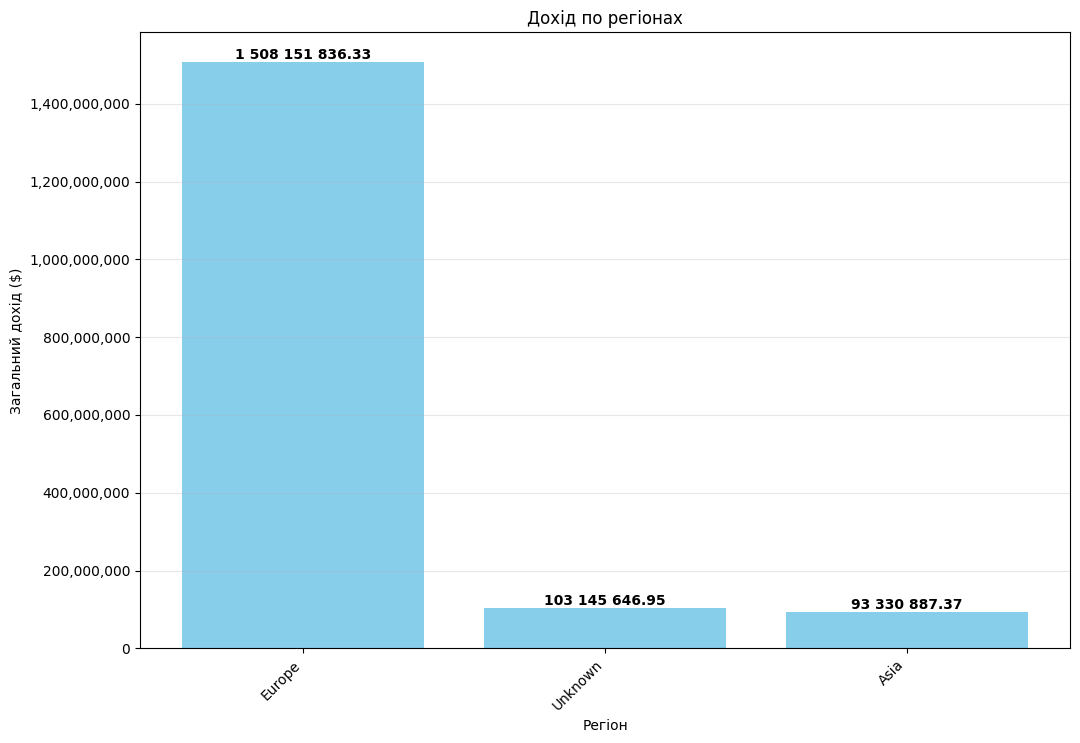

In [28]:
#Аналіз доходу в розрізі регіонів

region_revenue = df_final.groupby('Region')['Total_Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(region_revenue.index, region_revenue.values, color="skyblue")
plt.title("Дохід по регіонах")  # Title of the chart
plt.xlabel("Регіон")  # X-axis label
plt.ylabel("Загальний дохід ($)")  # Y-axis label
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),  # Трохи вище стовпця
        f"{bar.get_height():,.2f}".replace(',', ' '),  # Замінюємо кому на пробіл
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
        fontweight='bold'
    )
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

### Аналіз витрат

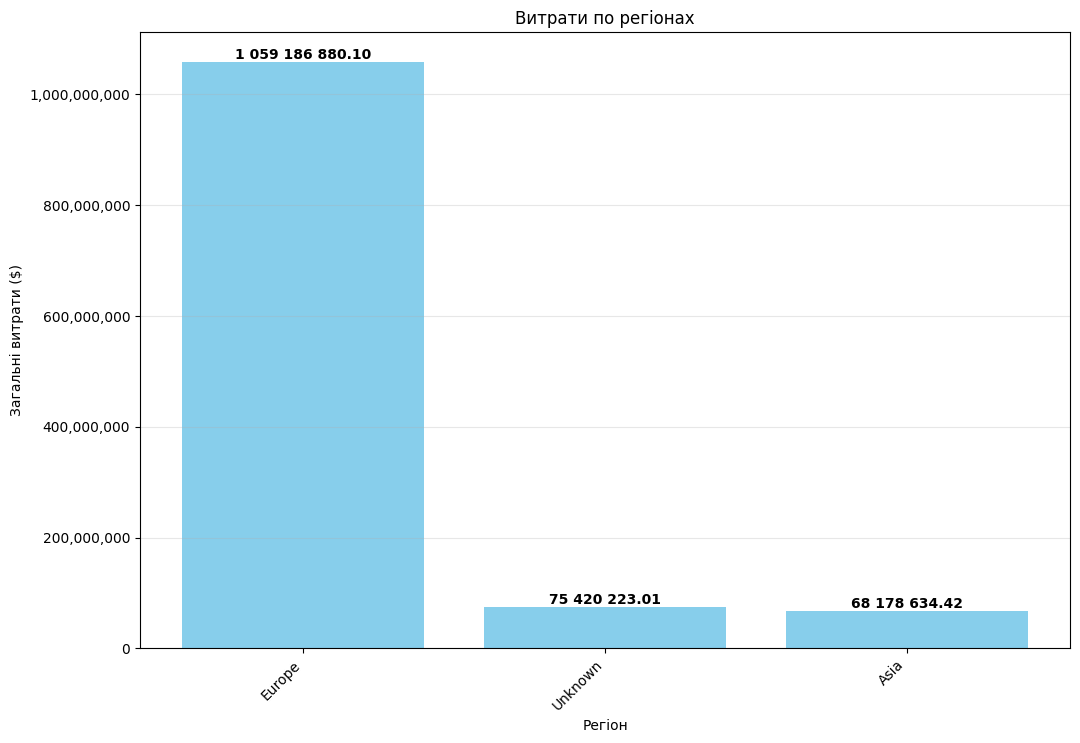

In [29]:
#Аналіз витрат в розрізі регіонів

region_cost = df_final.groupby('Region')['Total_Cost'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(region_cost.index, region_cost.values, color="skyblue")
plt.title("Витрати по регіонах")  # Title of the chart
plt.xlabel("Регіон")  # X-axis label
plt.ylabel("Загальні витрати ($)")  # Y-axis label
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.2f}".replace(',', ' '),  # Замінюємо кому на пробіл
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
        fontweight='bold'
    )
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

### Аналіз прибутку

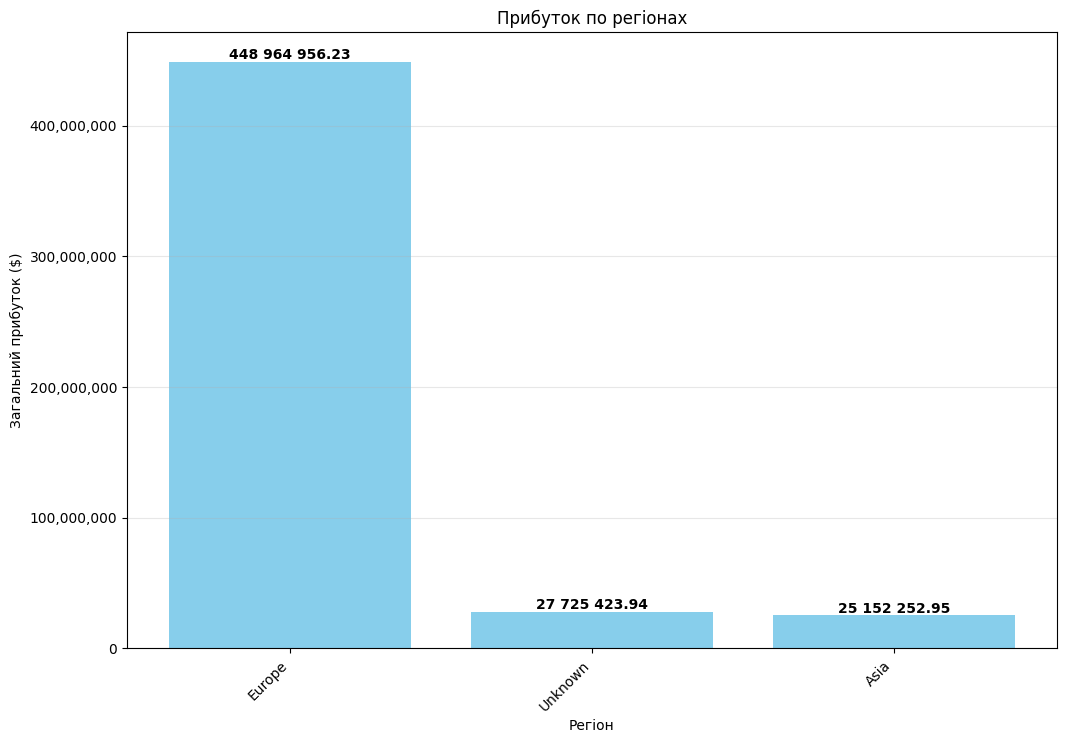

In [30]:
#Аналіз прибутку в розрізі регіонів

region_profit = df_final.groupby('Region')['Total_Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(region_profit.index, region_profit.values, color="skyblue")
plt.title("Прибуток по регіонах")  # Title of the chart
plt.xlabel("Регіон")  # X-axis label
plt.ylabel("Загальний прибуток ($)")  # Y-axis label
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.2f}".replace(',', ' '),  # Замінюємо кому на пробіл
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
        fontweight='bold'
    )
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

### Кількість продажів

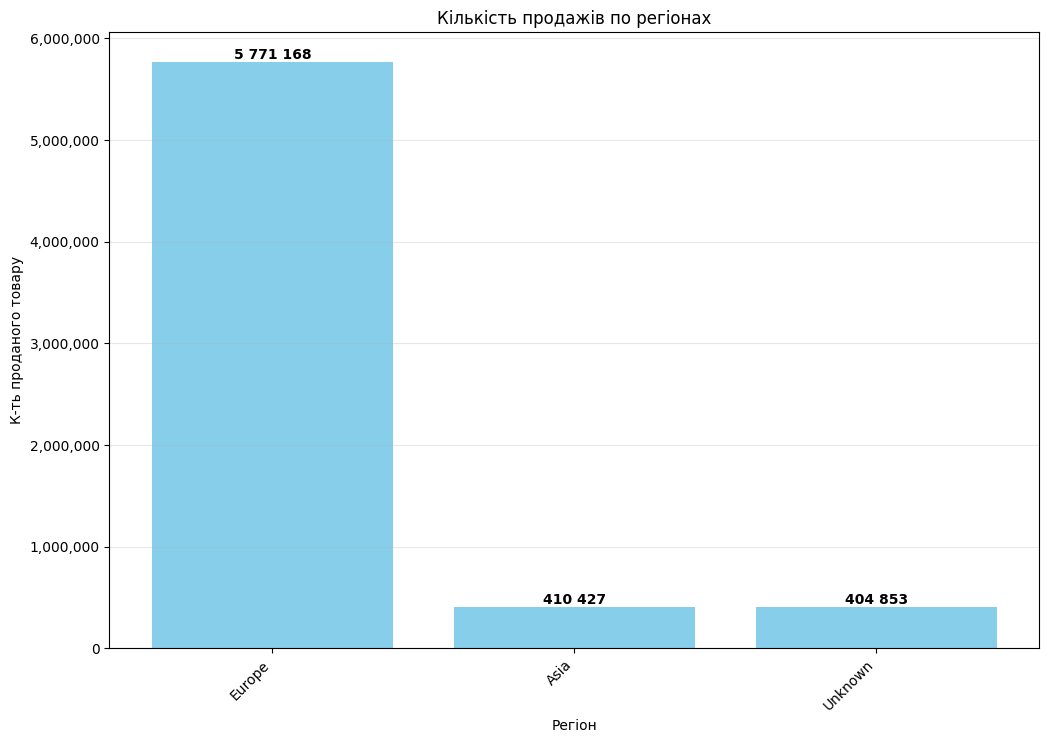

In [31]:
#Аналіз прибутку в розрізі регіонів

region_popularity = df_final.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(region_popularity.index, region_popularity.values, color="skyblue")
plt.title("Кількість продажів по регіонах")  # Title of the chart
plt.xlabel("Регіон")  # X-axis label
plt.ylabel("К-ть проданого товару")  # Y-axis label
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.0f}".replace(',', ' '),  # Замінюємо кому на пробіл
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
        fontweight='bold'
    )
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

## Аналіз продажів за каналами

### Аналіз доходу за каналами продажу

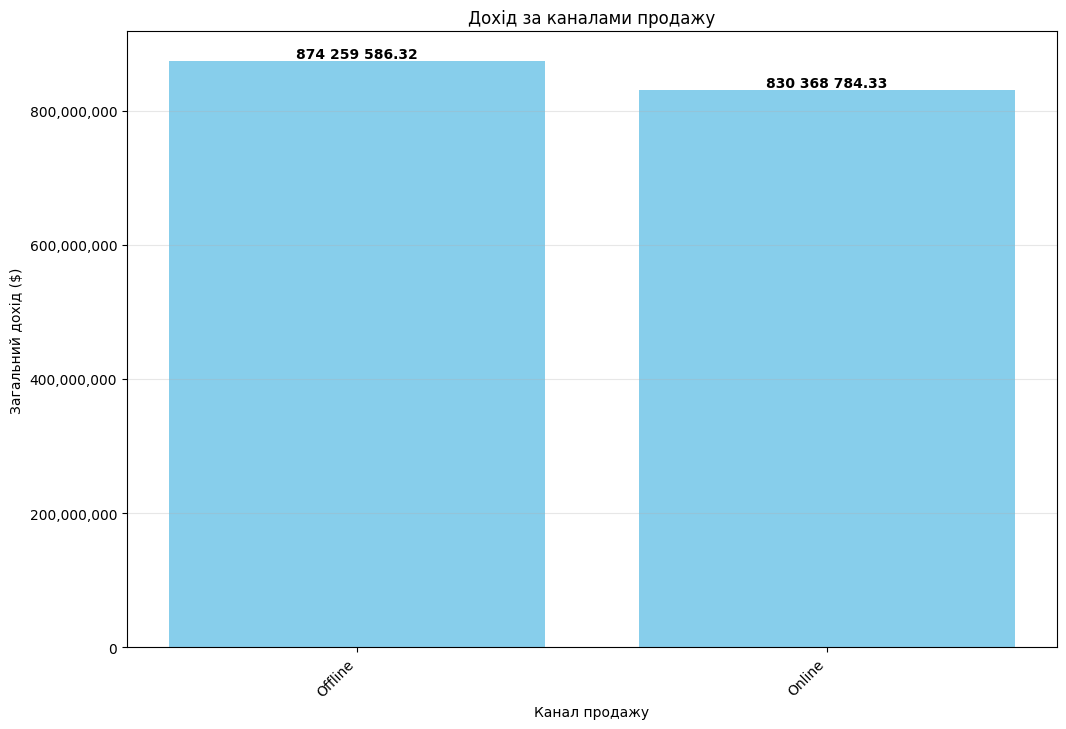

In [32]:
#Аналіз доходу в розрізі каналів продажу

channel_revenue = df_final.groupby('Sales_Channel')['Total_Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(channel_revenue.index, channel_revenue.values, color="skyblue")
plt.title("Дохід за каналами продажу")  # Title of the chart
plt.xlabel("Канал продажу")  # X-axis label
plt.ylabel("Загальний дохід ($)")  # Y-axis label
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.2f}".replace(',', ' '),
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
        fontweight='bold'
    )
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

### Аналіз витрат за каналами продажу

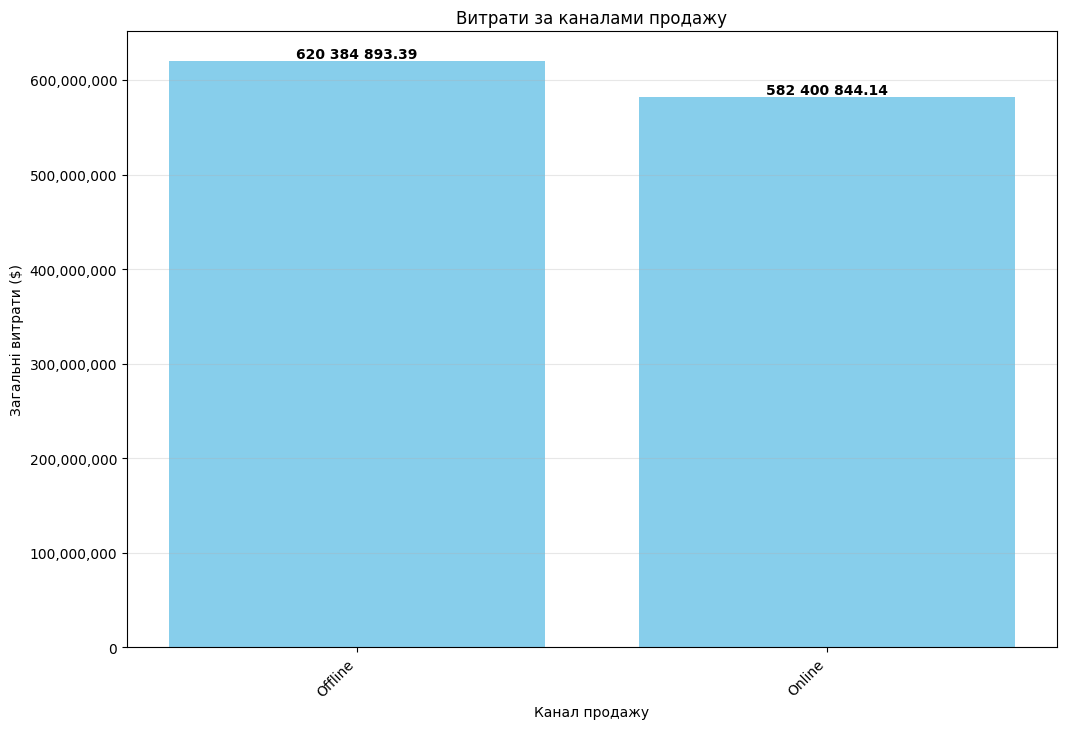

In [33]:
#Аналіз витрат в розрізі каналів продажу

channel_cost = df_final.groupby('Sales_Channel')['Total_Cost'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(channel_cost.index, channel_cost.values, color="skyblue")
plt.title("Витрати за каналами продажу")
plt.xlabel("Канал продажу")
plt.ylabel("Загальні витрати ($)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.2f}".replace(',', ' '),
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
        fontweight='bold'
    )
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

### Аналіз прибутку за каналами продажу

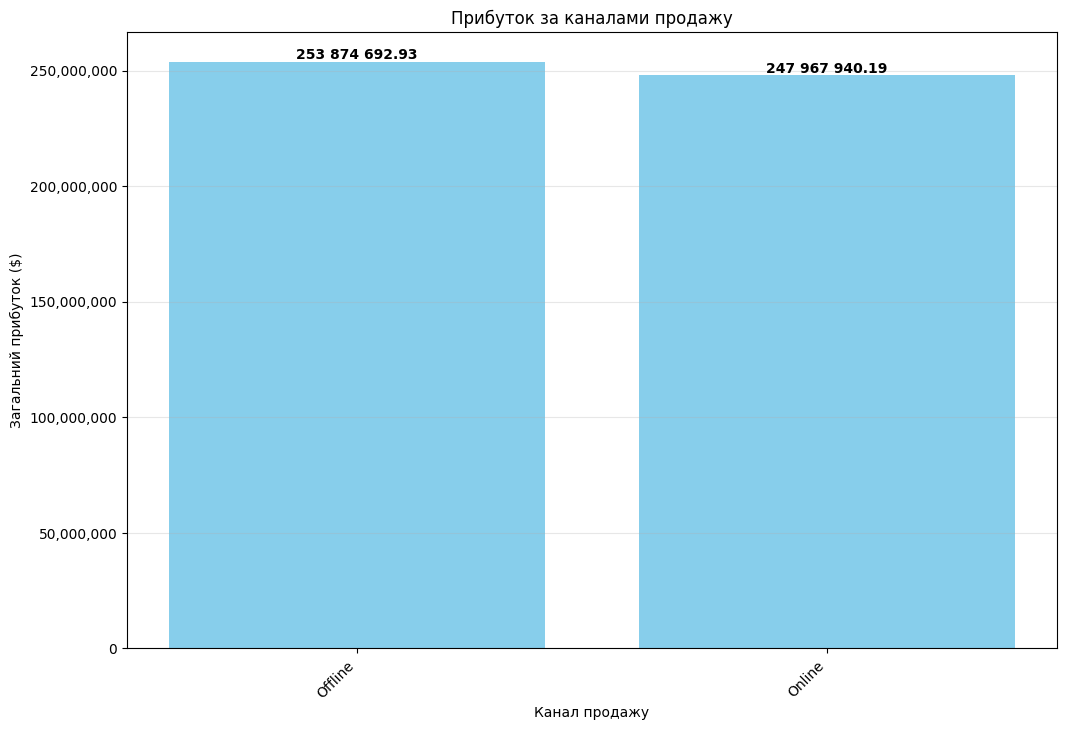

In [34]:
#Аналіз прибутку в розрізі каналів продажу

channel_profit = df_final.groupby('Sales_Channel')['Total_Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(channel_profit.index, channel_profit.values, color="skyblue")
plt.title("Прибуток за каналами продажу")  # Title of the chart
plt.xlabel("Канал продажу")  # X-axis label
plt.ylabel("Загальний прибуток ($)")  # Y-axis label
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),  # Трохи вище стовпця
        f"{bar.get_height():,.2f}".replace(',', ' '),  # Замінюємо кому на пробіл
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
        fontweight='bold'
    )
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

### Кількість продажів за каналами продажу

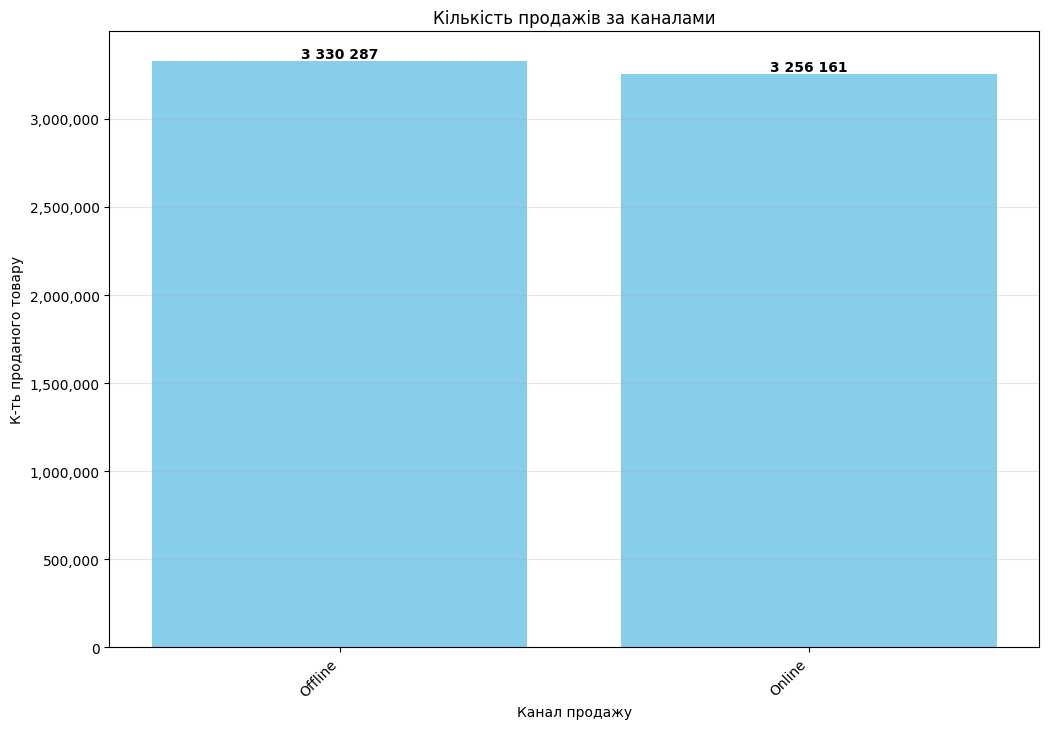

In [35]:
#Аналіз кількості проданого товару в розрізі каналів продажу

channel_sold = df_final.groupby('Sales_Channel')['Units_Sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(channel_sold.index, channel_sold.values, color="skyblue")
plt.title("Кількість продажів за каналами")  # Title of the chart
plt.xlabel("Канал продажу")  # X-axis label
plt.ylabel("К-ть проданого товару")  # Y-axis label
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),  # Трохи вище стовпця
        f"{bar.get_height():,.0f}".replace(',', ' '),  # Замінюємо кому на пробіл
        ha="center",
        va="bottom",
        color="black",
        fontsize=10,
        fontweight='bold'
    )
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

## Аналіз інтервалу часу між замовленням та його відвантаженням

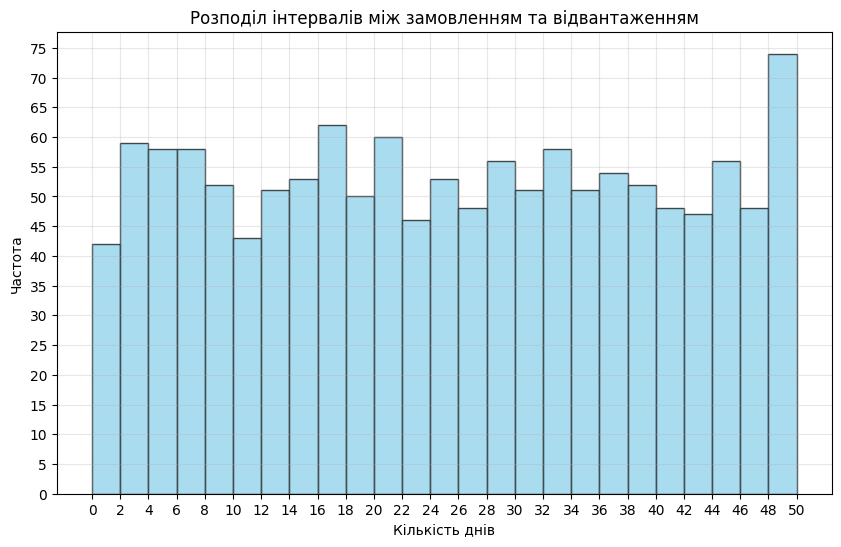

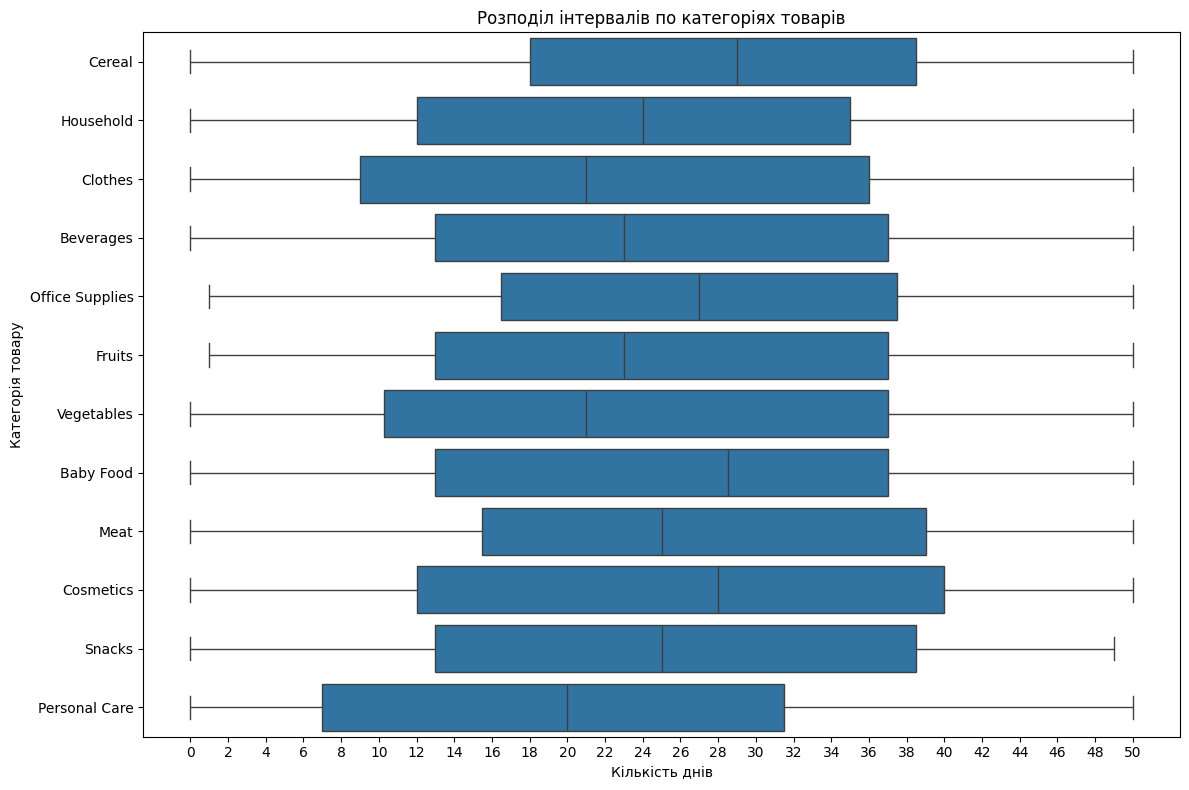

In [36]:
# 1. Гістограма розподілу днів
plt.figure(figsize=(10, 6))
plt.hist(df_final['Days_Interval'], bins=25, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Розподіл інтервалів між замовленням та відвантаженням')
plt.xlabel('Кількість днів')
plt.ylabel('Частота')
plt.grid(alpha=0.3)

x_ticks = np.arange(0, df_final['Days_Interval'].max() + 1, 2)
plt.xticks(x_ticks)

y_ticks = np.arange(0, plt.gca().get_ylim()[1] + 1, 5)
plt.yticks(y_ticks)

plt.show()

# 2. Боксплот за категоріями товарів
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_final, y='Item_Type', x='Days_Interval')
plt.title('Розподіл інтервалів по категоріях товарів')
plt.xlabel('Кількість днів')
plt.ylabel('Категорія товару')
plt.xticks(rotation=0)
plt.tight_layout()
x_ticks = np.arange(0, df_final['Days_Interval'].max() + 1, 2)
plt.xticks(x_ticks)
plt.show()

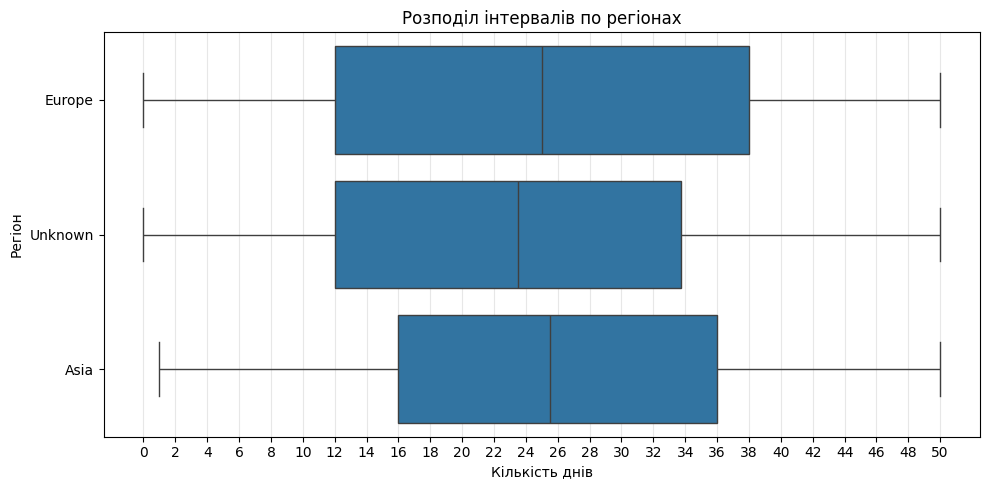

In [37]:
# 3. Мапа за середнім інтервалом по країнах (Plotly)
country_avg_interval = df_final.groupby('Country_Name')['Days_Interval'].mean().reset_index()

fig = px.choropleth(country_avg_interval,
                    locations="Country_Name",
                    locationmode='country names',
                    color="Days_Interval",
                    hover_name="Country_Name",
                    hover_data={'Days_Interval': ':.1f'},
                    color_continuous_scale="RdBu",
                    title="Середній інтервал між замовленням та відвантаженням по країнах",
                    labels={'Days_Interval': 'Середній інтервал (дні)'})
fig.show()

# 4. Боксплот по регіонах
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_final, y='Region', x='Days_Interval')
plt.title('Розподіл інтервалів по регіонах')
plt.xlabel('Кількість днів')
plt.ylabel('Регіон')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
x_ticks = np.arange(0, df_final['Days_Interval'].max() + 1, 2)
plt.xticks(x_ticks)
plt.show()

## Залежність прибутку від часу, необхідного на відвантаження товару.

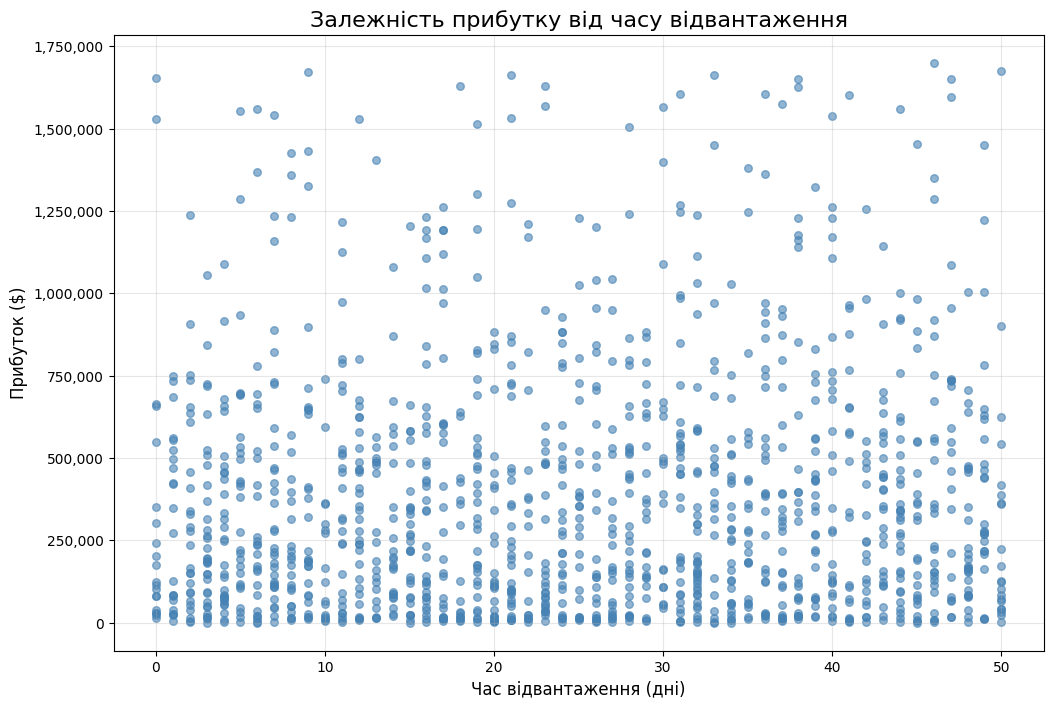

In [38]:
plt.figure(figsize=(12, 8))
plt.scatter(df_final['Days_Interval'], df_final['Total_Profit'],
           alpha=0.6, s=30, color='steelblue')
plt.title('Залежність прибутку від часу відвантаження', fontsize=16)
plt.xlabel('Час відвантаження (дні)', fontsize=12)
plt.ylabel('Прибуток ($)', fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(alpha=0.3)

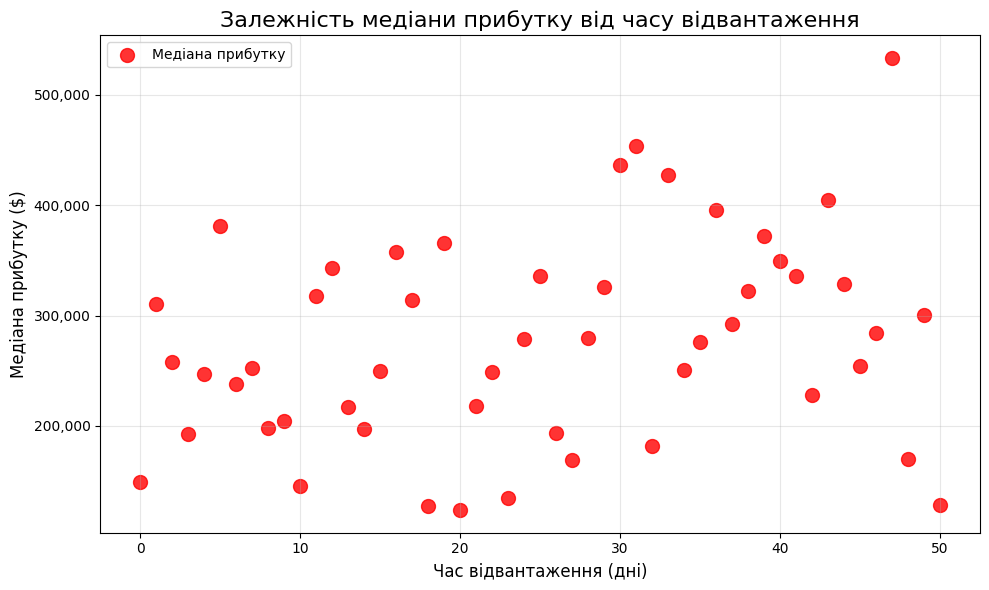

In [39]:
agg_data = df_final.groupby('Days_Interval')['Total_Profit'].median().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(agg_data['Days_Interval'], agg_data['Total_Profit'],
           s=100, color='red', alpha=0.8, label='Медіана прибутку')
plt.title('Залежність медіани прибутку від часу відвантаження', fontsize=16)
plt.xlabel('Час відвантаження (дні)', fontsize=12)
plt.ylabel('Медіана прибутку ($)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### Висновок до графіку
За цим графіком видно, що медіана прибутку сильно коливається і не залежить від часу відвантаження. Це означає, що прибуток, ймовірно, залежить від інших факторів, а не від того, як швидко доставляється товар.

## Аналіз динаміку продажів за місяцями

### Загальна динаміка продажів за місяцями

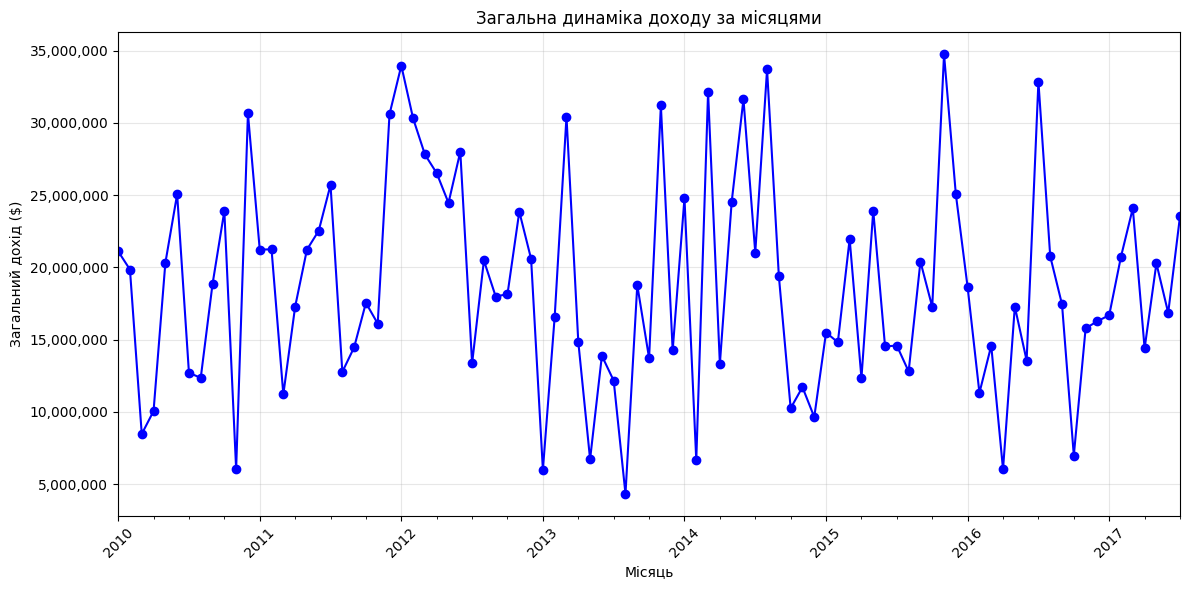

In [40]:
df_final['Month_Year'] = df_final['Order_Date'].dt.to_period('M')

# 1.1. Загальна динаміка доходу за місяцями
monthly_revenue = df_final.groupby('Month_Year')['Total_Revenue'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='blue')
plt.title('Загальна динаміка доходу за місяцями')
plt.xlabel('Місяць')
plt.ylabel('Загальний дохід ($)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

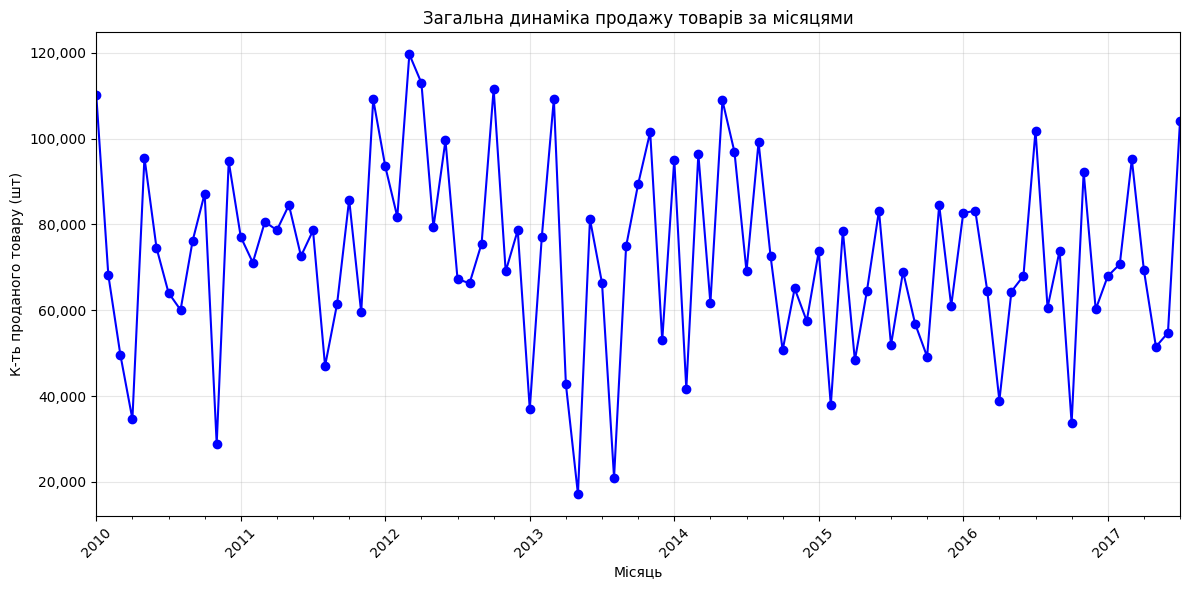

In [41]:
df_final['Month_Year'] = df_final['Order_Date'].dt.to_period('M')

# 1.2. Загальна динаміка кількості продажу товарів за місяцями
monthly_sold = df_final.groupby('Month_Year')['Units_Sold'].sum()

plt.figure(figsize=(12, 6))
monthly_sold.plot(kind='line', marker='o', color='blue')
plt.title('Загальна динаміка продажу товарів за місяцями')
plt.xlabel('Місяць')
plt.ylabel('К-ть проданого товару (шт)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### Динаміка продажів за категоріями товарів

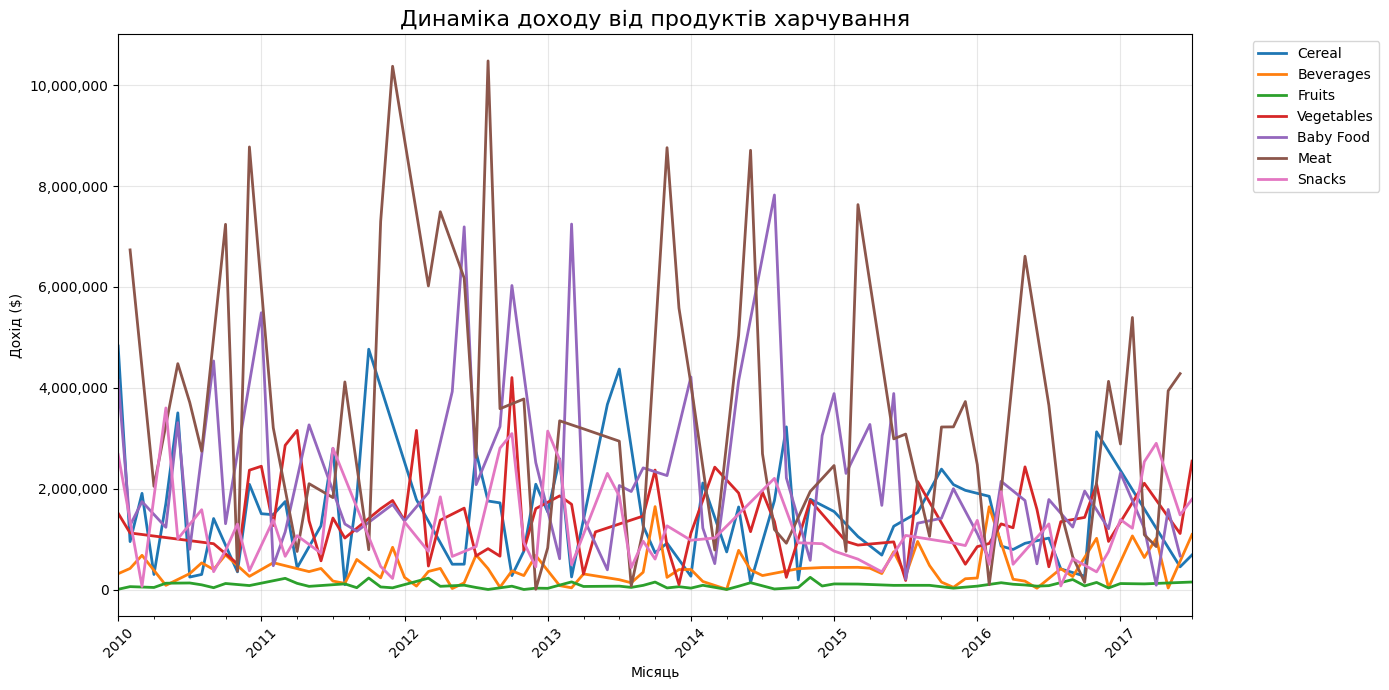

In [42]:
# Визначаємо групи товарів
food_categories = ['Cereal', 'Beverages', 'Fruits', 'Vegetables', 'Baby Food', 'Meat', 'Snacks']
non_food_categories = ['Household', 'Clothes', 'Office Supplies', 'Cosmetics', 'Personal Care']

# 2.1. Графік для продуктів харчування
plt.figure(figsize=(14, 7))

for category in food_categories:
    category_data = df_final[df_final['Item_Type'] == category]
    monthly_sales = category_data.groupby('Month_Year')['Total_Revenue'].sum()
    monthly_sales.plot(label=category, linewidth=2)

plt.title('Динаміка доходу від продуктів харчування', fontsize=16)
plt.xlabel('Місяць')
plt.ylabel('Дохід ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

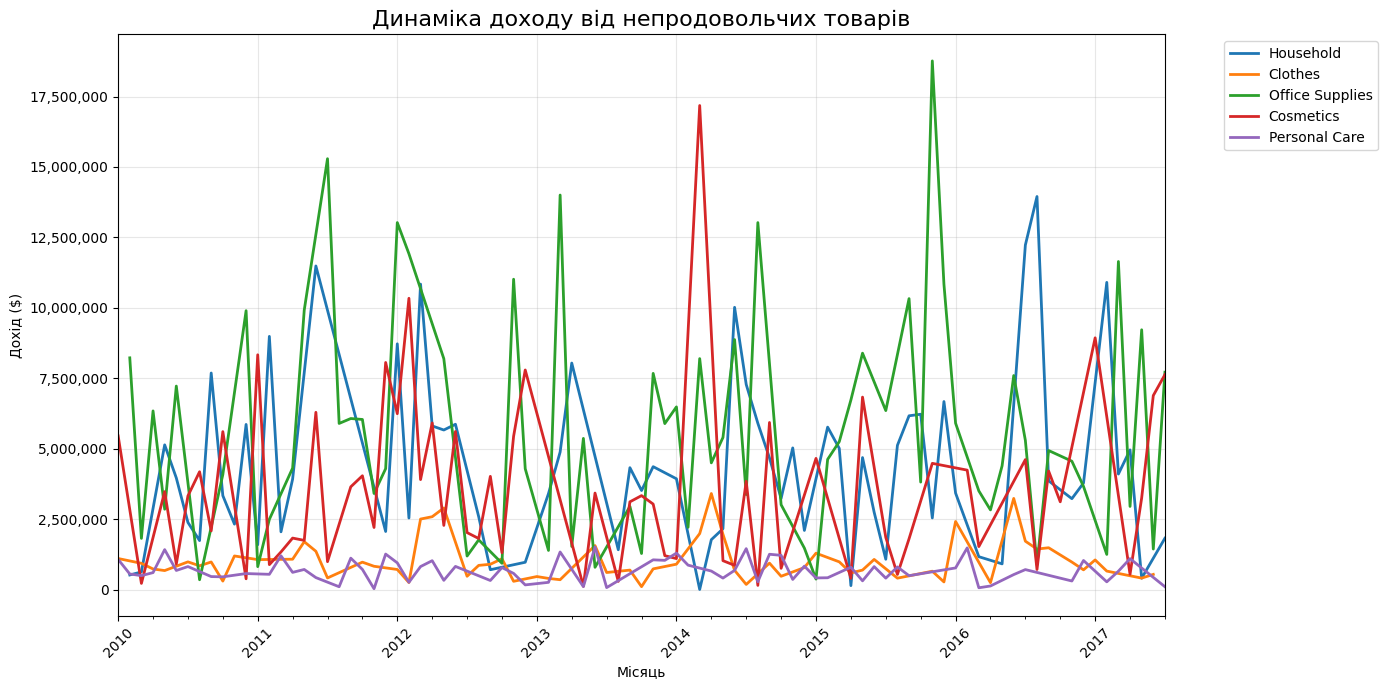

In [43]:
# 2.2. Графік для непродовольчих товарів
plt.figure(figsize=(14, 7))

for category in non_food_categories:
    category_data = df_final[df_final['Item_Type'] == category]
    monthly_sales = category_data.groupby('Month_Year')['Total_Revenue'].sum()
    monthly_sales.plot(label=category, linewidth=2)

plt.title('Динаміка доходу від непродовольчих товарів', fontsize=16)
plt.xlabel('Місяць')
plt.ylabel('Дохід ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### Динаміка продажів за країнами

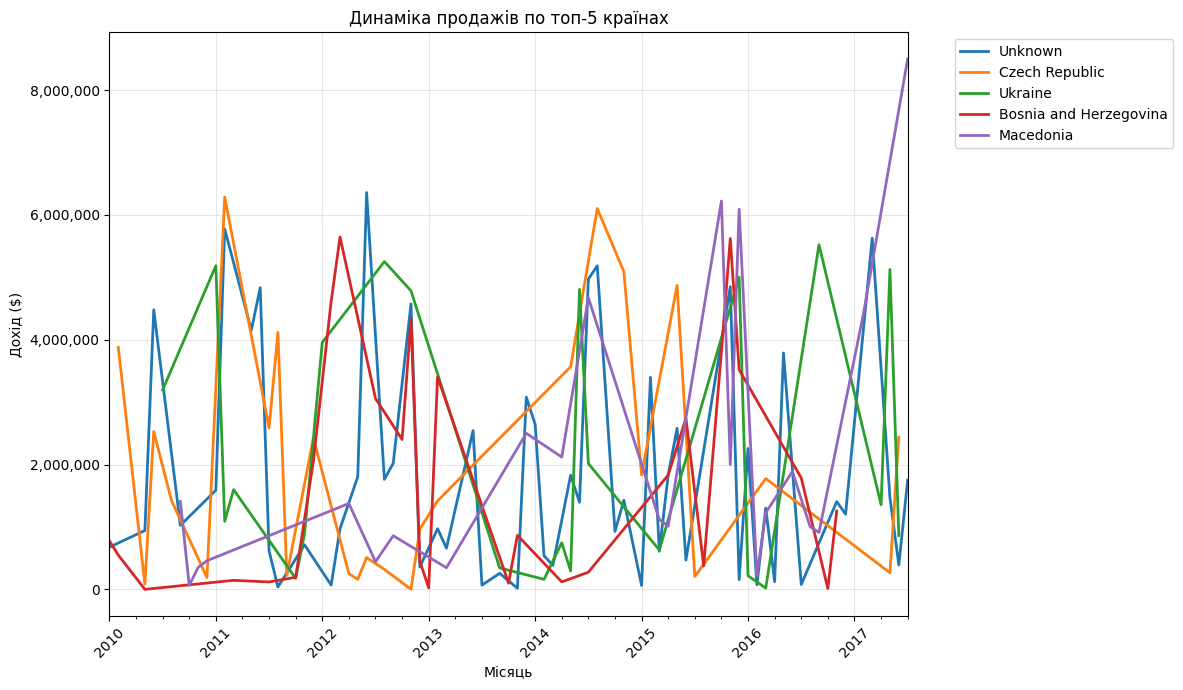

In [44]:
top_countries = df_final.groupby('Country_Name')['Total_Revenue'].sum().nlargest(5).index

# 3. Графік продажів за країнами
plt.figure(figsize=(12, 7))
for country in top_countries:
    country_data = df_final[df_final['Country_Name'] == country]
    monthly_country = country_data.groupby('Month_Year')['Total_Revenue'].sum()
    monthly_country.plot(label=country, linewidth=2)

plt.title('Динаміка продажів по топ-5 країнах')
plt.xlabel('Місяць')
plt.ylabel('Дохід ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### Динаміка продажів за регіонами

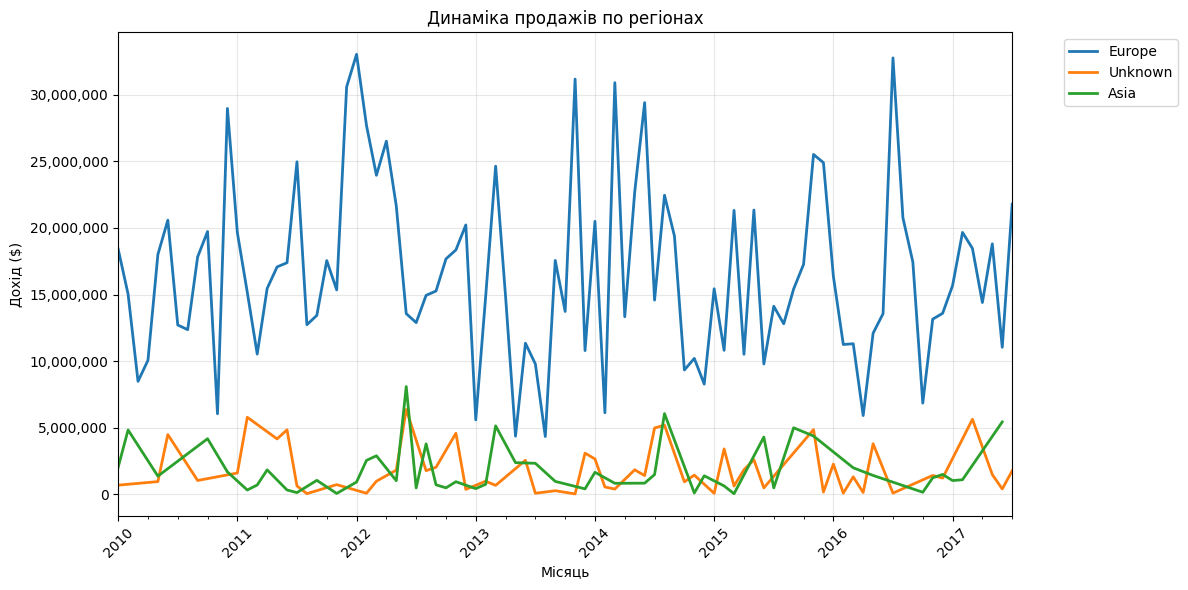

In [45]:
# 4. Графік продажів за регіонами
plt.figure(figsize=(12, 6))
for region in df_final['Region'].unique():
    region_data = df_final[df_final['Region'] == region]
    monthly_region = region_data.groupby('Month_Year')['Total_Revenue'].sum()
    monthly_region.plot(label=region, linewidth=2)

plt.title('Динаміка продажів по регіонах')
plt.xlabel('Місяць')
plt.ylabel('Дохід ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### Висновок до візуалізацій

Загальна динаміка доходу і кількості проданого товару щомісячно сильно коливаються. Також ці показники тісно пов'язані.

Графік динаміки продуктових товарів дпоказує, що найбільший і найбільш змінний дохід приносять м'ясо та дитяче харчування, які мають пікові значення продажів. Водночас дохід від таких категорій, як овочі, фрукти, крупи, напої та снеки, є  меншим але стабільнішим.

Графіку динаміки непродовольчих товарів показує, що найбільший і найменш стабільний дохід приносять товари для дому, офісне приладдя та косметика, які показують стрибки продажів. Але водночас, продажі одягу та засобів особистої гігієни приносять значно менший і більш стабільний дохід, не маючи таких високих піків.

Графік динаміки доходу за топ-5 країнами демонструє, що найвищий дохід приносять Македонія, Україна, Чехія, Боснія і Герцеговина, а також сюди потріпили невідомі країни (Unknown)

Графік динаміки доходу за регіонами чітко демонструє, що Європа є основним джерелом доходу протягом досліджуваного періоду. Продажі в цьому регіоні значно перевищують продажі в Азії та в невідомому регіоні, хоча й мають значні щомісячні коливання. Азія та невідомий регіон показують набагато менший дохід, який також є менш стабільним.

## Аналіз продажів за днями тижня

### Аналіз загальних доходів за днями тижня

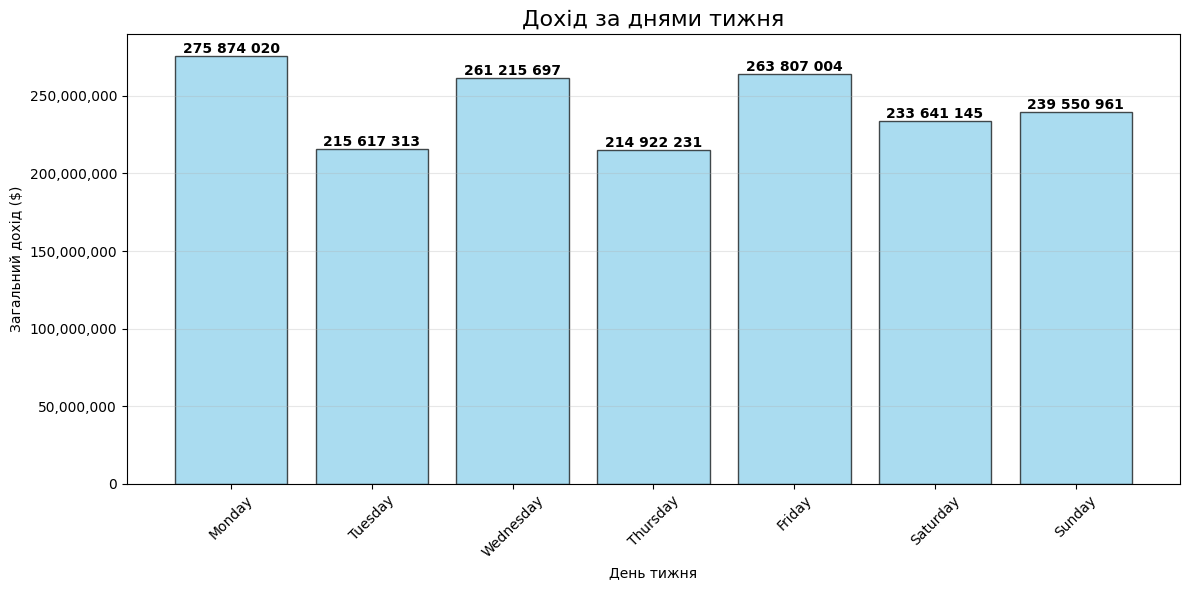

In [46]:
df_final['Day_of_Week'] = df_final['Order_Date'].dt.day_name()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

revenue_by_day = df_final.groupby('Day_of_Week')['Total_Revenue'].sum().reindex(days_order)

plt.figure(figsize=(12, 6))
bars = plt.bar(revenue_by_day.index, revenue_by_day.values, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Дохід за днями тижня', fontsize=16)
plt.xlabel('День тижня')
plt.ylabel('Загальний дохід ($)')
plt.xticks(rotation=45)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.0f}".replace(',', ' '),
        ha="center", va="bottom", fontweight="bold", color="black", fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### Аналіз загальної кількості проданого товару за днями тижня

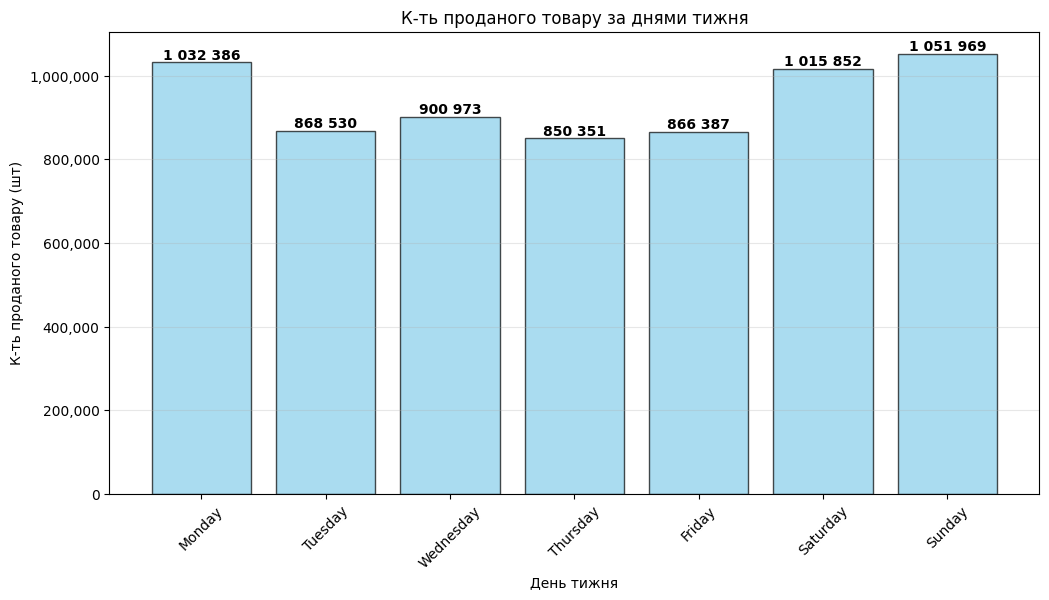

In [47]:
sold_by_day = df_final.groupby('Day_of_Week')['Units_Sold'].sum().reindex(days_order)

plt.figure(figsize=(12, 6))
bars = plt.bar(sold_by_day.index, sold_by_day.values, color='skyblue', alpha=0.7, edgecolor='black')

plt.title('К-ть проданого товару за днями тижня')
plt.xlabel('День тижня')
plt.ylabel('К-ть проданого товару (шт)')
plt.xticks(rotation=45)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.0f}".replace(',', ' '),
        ha="center", va="bottom", fontweight="bold", color="black", fontsize=10)


plt.grid(axis='y', alpha=0.3)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

### Аналіз доходів за категоріями за днями тижня

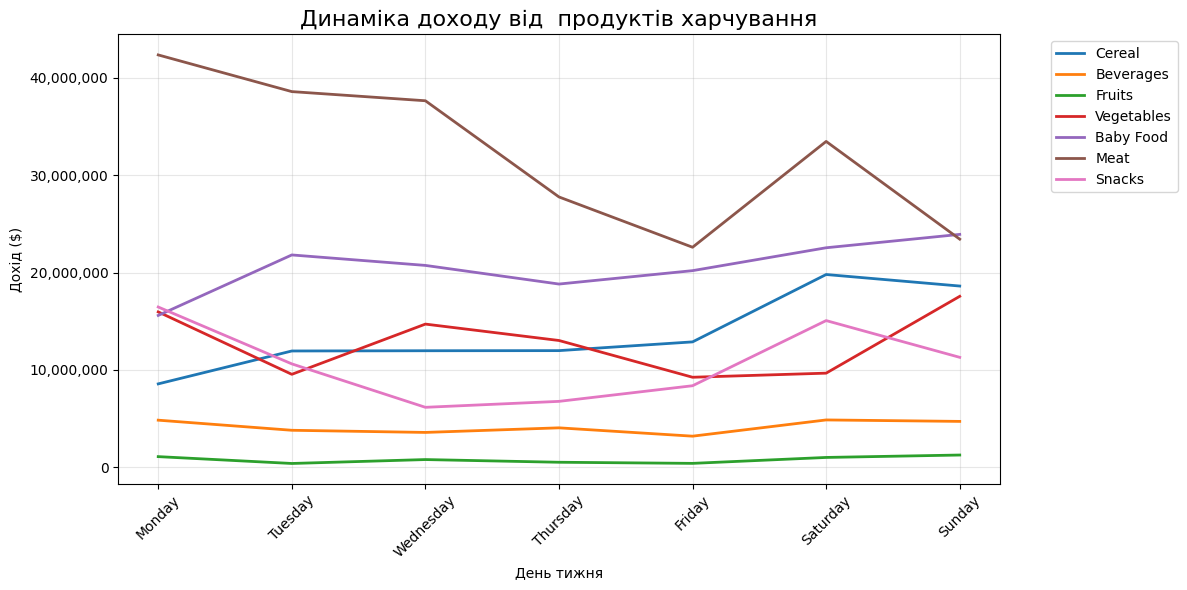

In [48]:
# Графік для продуктів харчування
plt.figure(figsize=(12, 6))

for category in food_categories:
    category_data = df_final[df_final['Item_Type'] == category]
    dayly_sales = category_data.groupby('Day_of_Week')['Total_Revenue'].sum().reindex(days_order)
    dayly_sales.plot(label=category, linewidth=2)

plt.title('Динаміка доходу від  продуктів харчування', fontsize=16)
plt.xlabel('День тижня')
plt.ylabel('Дохід ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

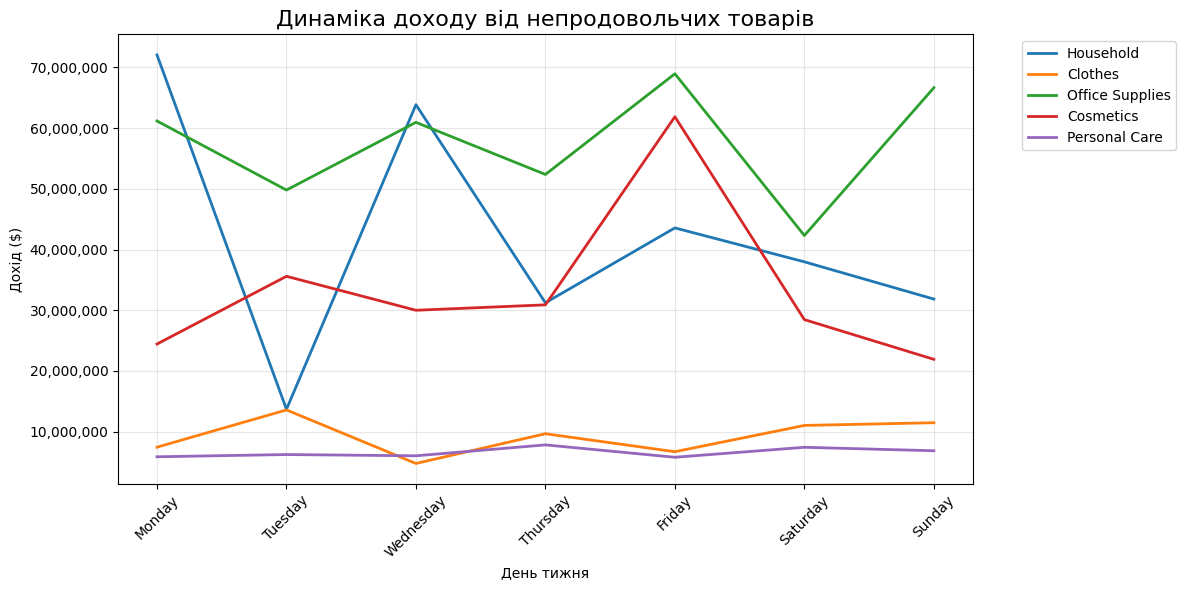

In [49]:
# Графік для непродовольчих товарів
plt.figure(figsize=(12, 6))

for category in non_food_categories:
    category_data = df_final[df_final['Item_Type'] == category]
    monthly_sales = category_data.groupby('Day_of_Week')['Total_Revenue'].sum().reindex(days_order)
    monthly_sales.plot(label=category, linewidth=2)

plt.title('Динаміка доходу від непродовольчих товарів', fontsize=16)
plt.xlabel('День тижня')
plt.ylabel('Дохід ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

### Висновок про попит на товари протягом тижня

У продажах спостерігається певна сезонність протягом тижня. Найбільший дохід та кількість товару продаються на початку тижня (в понеділок), тоді як середина тижня (вівторок, четвер) показує помітне зниження активності.

Це говорить про те, що продажі є найвищими у понеділок, можливо, через закупівлі на початку робочого тижня, та більше кількість покупок (але не доходу)на вихідних, коли люди мають більше вільного часу для покупок.

Сезонність продажів існує як у продовольчих, так і в непродовольчих товарах, але вона проявляється по-різному. У продуктових товарах м'ясо має найбільший попит на початку тижня та в суботу; крупи купують найбільше в суботу; снеки - в понеділо иа суботу; овочі - в понеділок, середу та неділу; всі інші продуктові товари продаються відносно стабільно протягом тижня. У непродовольчих товарах товари для дому мають найбільший попит в понеділок і найменший - у вівторок; одяг найчастіше купують у вівторок та на вихідних; косметику - у п'ятницю; офісне приладдя найчастіше замовляють в п'ятницю.

## Аналіз маржинальності

### Аналіз маржинальності за категоріями

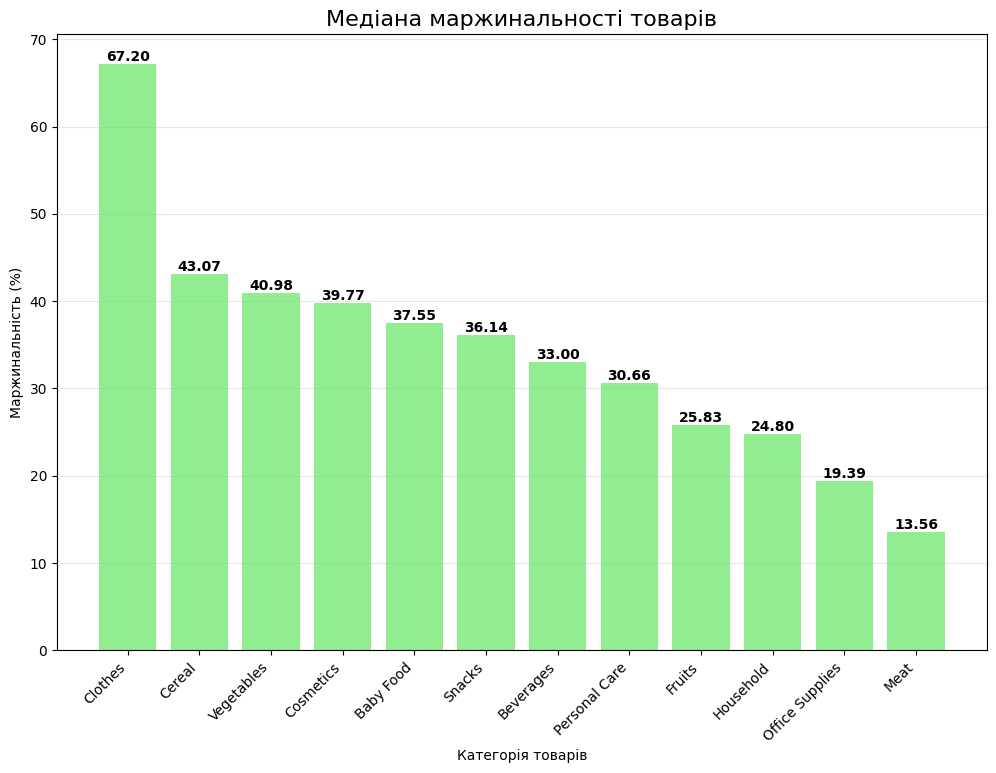

In [50]:
category_margin = df_final.groupby('Item_Type')['Marginality'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(category_margin.index, category_margin.values, color="lightgreen")
plt.title('Медіана маржинальності товарів', fontsize=16)
plt.xlabel('Категорія товарів')
plt.ylabel('Маржинальність (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.2f}".replace(',', ' '),
        ha="center", va="bottom", fontweight="bold", color="black", fontsize=10)

plt.show()

### Аналіз маржинальності за днями тижня

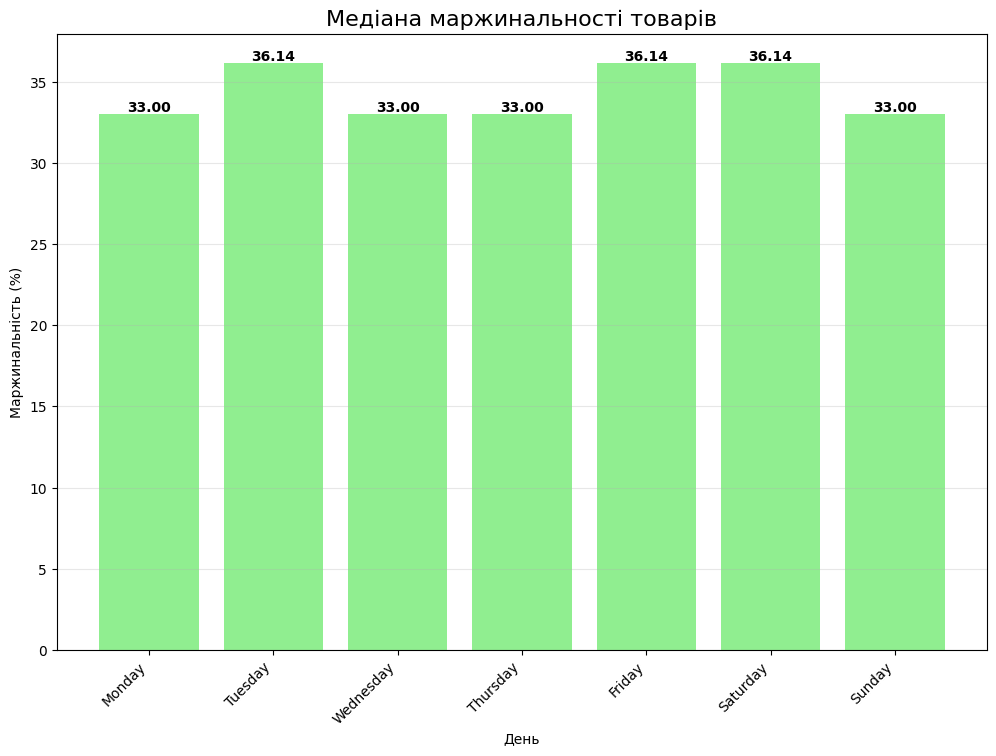

In [51]:
daily_margin = df_final.groupby('Day_of_Week')['Marginality'].median().reindex(days_order)

plt.figure(figsize=(12, 8))
bars = plt.bar(daily_margin.index, daily_margin.values, color="lightgreen")
plt.title('Медіана маржинальності товарів', fontsize=16)
plt.xlabel('День')
plt.ylabel('Маржинальність (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.2f}".replace(',', ' '),
        ha="center", va="bottom", fontweight="bold", color="black", fontsize=10)

plt.show()

# Reporting

З аналізу видно, що компанія стабільно зростає, але різні категорії товарів дають різний результат. Найбільше продається офісне приладдя та товари для дому, проте саме одяг приносить найбільший прибуток завдяки високій маржинальності. Продукти харчування продаються у великих обсягах, але їхня прибутковість низька, що говорить про потребу краще працювати з цінами та витратами.

Основний прибуток іде з європейського ринку, особливо з України та країн Східної Європи. Західна Європа поки приносить мало доходу, але може стати перспективним напрямком для розвитку. Продажі добре йдуть як онлайн, так і офлайн, хоча офлайн дає трохи більше виручки та прибутку.

Є чітка сезонність: найбільше купують у понеділок та на вихідних, а також спостерігаються місячні коливання — особливо у категоріях м’яса, дитячого харчування та офісного приладдя. Це означає, що компанія може підсилити продажі за рахунок акцій у потрібні дні та місяці. Загалом бізнес виглядає стабільним, але варто звертати більшу увагу на більш прибуткові товари.

